In [2]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath("../../mathematical_models"))
from mathematical_models.s_on_f import ScalarOnFunctionModel

sys.path.append(os.path.abspath("../../optimizers"))
from optimizers.cordex_continuous import CordexContinuous
from optimizers.cordex_discrete import CordexDiscrete

sys.path.append(os.path.abspath("../../utilities"))
from utilities.plotting.plot_fun import subplot_results, subplot_b_spline_results

### Settings

In [3]:
N = 4 # runs
Kx_family = 'step'
Kx = [[4]]
Kb = [[2]] # Polynomial
epochs = 100
refinement_epochs = 100
lvls = [-1, 1]
s_on_f_model = ScalarOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family)

### Continuous

In [4]:
optimizer_s_on_f = CordexContinuous(model=s_on_f_model, runs=N)
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(epochs=epochs)

100%|██████████| 100/100 [00:00<00:00, 290.09it/s]


Best objective value (A): 8.75


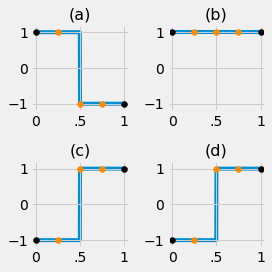

In [4]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_s_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_s_on_f,2)}')

### Discrete

In [5]:
optimizer_s_on_f = CordexDiscrete(model=s_on_f_model, runs=N, levels=lvls)
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(epochs=epochs)

 59%|█████▉    | 59/100 [00:00<00:00, 426.27it/s]

<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852701f70>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852740310>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852740a60>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852740550>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852740940>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd8526a3940>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852740550>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852740a60>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852701f70>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852740550>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd8526a3940>
<function CordexDiscrete._get_objective_function.<loca

100%|██████████| 100/100 [00:00<00:00, 404.66it/s]



<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852726700>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852740940>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852740b80>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852740af0>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd8527409d0>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852740310>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852739ee0>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852739b80>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852739a60>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852739790>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd8527398b0>
<function CordexDiscrete._get_objective_function.<loc

 20%|██        | 20/100 [00:00<00:00, 196.27it/s]

<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852720dc0>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852720160>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852720ca0>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852720430>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd8527205e0>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852701f70>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852720ee0>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd8527204c0>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd830543a60>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd830543d30>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852740550>
<function CordexDiscrete._get_objective_function.<loca

100%|██████████| 100/100 [00:00<00:00, 267.47it/s]

<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852720d30>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852720040>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852720f70>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852720160>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852720430>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd8527208b0>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd8527209d0>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852720dc0>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd852720280>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd8405a41f0>
<function CordexDiscrete._get_objective_function.<locals>.<lambda> at 0x7fd8527209d0>
<function CordexDiscrete._get_objective_function.<loca

Best objective value (A): 8.75


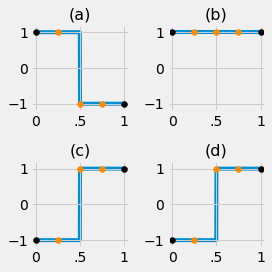

In [6]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_s_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_s_on_f,2)}')

### NBDO

### Test Js

In [7]:
# Step - Poly
s_on_f_model = ScalarOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family)
s_on_f_model.get_Jcb()

array([[0.25   , 0.03125],
       [0.25   , 0.09375],
       [0.25   , 0.15625],
       [0.25   , 0.21875]])

In [8]:
# B-spline - Poly
k_degree = 3
Kx_family = 'b-spline'
s_on_f_model = ScalarOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family, k_degree=k_degree)
s_on_f_model.get_Jcb()

array([[0.25, 0.05],
       [0.25, 0.1 ],
       [0.25, 0.15],
       [0.25, 0.2 ]])

### Test plotting b-spline basis

In [9]:
s_on_f_model = ScalarOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family, k_degree=k_degree)
optimizer_s_on_f = CordexContinuous(model=s_on_f_model, runs=N)

In [10]:
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(epochs=epochs)

100%|██████████| 100/100 [00:00<00:00, 285.80it/s]


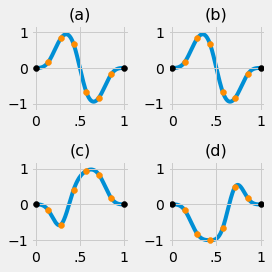

Best objective value (A): 12.41


In [11]:
subplot_b_spline_results(2, 2, np.linspace(0,1,1000), best_design_s_on_f, k_degree)
print(f'Best objective value (A): {np.round(best_objective_value_s_on_f,2)}')